# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
geo_data_0=pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
geo_data_1=pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
geo_data_2=pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Вывод: На этом этапы мы загрузили данные и проверили, что загрузка прошла успешно

Теперь можно подготовить данные к работе

In [5]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Вывод: Мы видим, что ошибок в типе данных нету. К тому же, нигде нету пропусков. Дальше проведём исследовательский анализ данных.

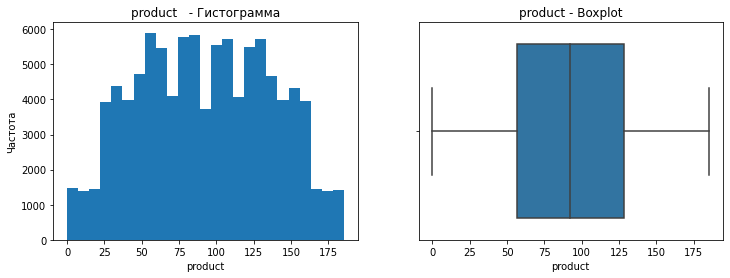

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64


In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
geo_data_0['product'].plot.hist(bins=25, ax=axes[0])
axes[0].set_title('product   - Гистограмма')
axes[0].set_xlabel('product')
axes[0].set_ylabel('Частота')
sns.boxplot(x=geo_data_0['product'], ax=axes[1])
axes[1].set_title('product - Boxplot')
axes[1].set_xlabel('product')
plt.show()
print(geo_data_0['product'].describe())

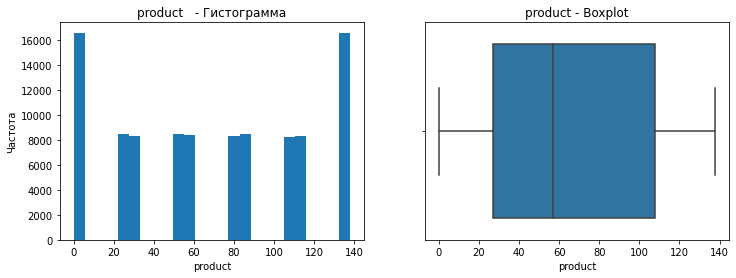

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64


In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
geo_data_1['product'].plot.hist(bins=25, ax=axes[0])
axes[0].set_title('product   - Гистограмма')
axes[0].set_xlabel('product')
axes[0].set_ylabel('Частота')
sns.boxplot(x=geo_data_1['product'], ax=axes[1])
axes[1].set_title('product - Boxplot')
axes[1].set_xlabel('product')
plt.show()
print(geo_data_1['product'].describe())

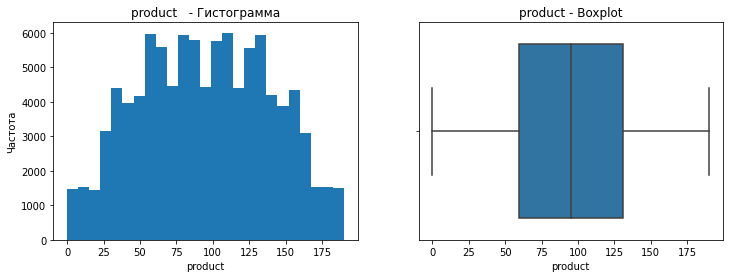

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64


In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
geo_data_2['product'].plot.hist(bins=25, ax=axes[0])
axes[0].set_title('product   - Гистограмма')
axes[0].set_xlabel('product')
axes[0].set_ylabel('Частота')
sns.boxplot(x=geo_data_2['product'], ax=axes[1])
axes[1].set_title('product - Boxplot')
axes[1].set_xlabel('product')
plt.show()
print(geo_data_2['product'].describe())

Выбросов не обнаружено.


In [11]:
geo_data_0['id'].duplicated().any()

True

In [12]:
geo_data_0=geo_data_0.drop_duplicates(['id']).reset_index(drop=True) 

In [13]:
geo_data_0['id'].duplicated().any()

False

In [14]:
geo_data_1['id'].duplicated().any()

True

In [15]:
geo_data_1=geo_data_1.drop_duplicates(['id']).reset_index(drop=True)

In [16]:
geo_data_1['id'].duplicated().any()

False

In [17]:
geo_data_2['id'].duplicated().any()

True

In [18]:
geo_data_2=geo_data_2.drop_duplicates(['id']).reset_index(drop=True)

In [19]:
geo_data_2['id'].duplicated().any()

False

### Вывод:
1)В данных нет пропусков
2)Нет дубликатов
3)Типы данных подходящие
4)Масштабы распределений признаков не сильно отличны, масштабирование применять не будем
5)На данном этапе мы оставляем данные в том виде, в котором они нам предоставлены

## Обучение и проверка модели

Выведем целевой признак.

In [20]:
features = ['f0', 'f1', 'f2']
target = ['product']

X_0 = geo_data_0[features]
y_0 = geo_data_0[target]
X_1 = geo_data_1[features]
y_1 = geo_data_1[target]
X_2 = geo_data_2[features]
y_2 = geo_data_2[target]
RANDOM_STATE=25

In [21]:
def predict(X, y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predicts = model.predict(X_valid)
    predicts_mean=predicts.mean()
    RMSE=mean_squared_error(y_valid, predicts)**.5
    print('Средний запас предсказанного сырья {:.2f}'.format(predicts_mean))
    print('RMSE модели. {:.2f}'.format(RMSE))
    return y_valid, predicts

In [22]:
y_true_0, y_pred_0=predict(X_0, y_0)

Средний запас предсказанного сырья 92.69
RMSE модели. 37.80


In [23]:
y_true_1, y_pred_1=predict(X_1, y_1)

Средний запас предсказанного сырья 68.96
RMSE модели. 0.89


In [24]:
y_true_2, y_pred_2=predict(X_2, y_2)

Средний запас предсказанного сырья 94.92
RMSE модели. 40.22


### Вывод:
1)В регионе 0 средний запас предсказанного сырья достаточно большой(92.56), но и RMSE высокая(37.66)
2)В регионе 2 ситация похожая. Средний запас предсказанного сырья достаточно большой(94.92), но и RMSE высокая(40.22)
3)А вот в регионе 2 средний запас предсказанного сырья не такой большой(68.96), зато RMSE маленькая(0.89) 

## Подготовка к расчёту прибыли

In [25]:
all_places=500
required_places=200
budget=10e9
income=450000

In [26]:
print('Необходимый объём сырья для безубыточной разработки новой скважины', budget/(required_places*income))

Необходимый объём сырья для безубыточной разработки новой скважины 111.11111111111111


In [27]:
print('Среднее значение целевой переменной в регионе 0', geo_data_0[target].mean())

Среднее значение целевой переменной в регионе 0 product    92.499684
dtype: float64


In [28]:
print('Среднее значение целевой переменной в регионе 1', geo_data_1[target].mean())

Среднее значение целевой переменной в регионе 1 product    68.823916
dtype: float64


In [29]:
print('Среднее значение целевой переменной в регионе 2', geo_data_2[target].mean())

Среднее значение целевой переменной в регионе 2 product    94.998342
dtype: float64


### Вывод:
Минимальный объём сырья для безубыточной разработки новой скважины-111,11. Это намного больше чем среднее значение по регионам, однако в этих регионах есть значения побольше.

## Расчёт прибыли и рисков 

Переведём данные в формат pd.Series

In [30]:
y_true_0 = pd.Series(y_true_0['product']).reset_index(drop=True)
y_true_1 = pd.Series(y_true_1['product']).reset_index(drop=True)
y_true_2 = pd.Series(y_true_2['product']).reset_index(drop=True)

y_pred_0 = pd.Series(y_pred_0[:, 0])
y_pred_1 = pd.Series(y_pred_1[:, 0])
y_pred_2 = pd.Series(y_pred_2[:, 0])

In [31]:
def income_predict(y_target, top_predictions):
    top_targets = y_target[top_predictions.index]
    top_sum = top_targets.sum()
    top_income = top_sum * income - budget
    return top_income

Добавим некоторые переменные для техники Bootstrap

In [32]:
samples_count = 1000
alpha = 0.05

In [33]:
def risk_predict(title, y_target, y_predict):
    incomes = []
    loss_count = 0
    state = np.random.RandomState(RANDOM_STATE)
    for i in range(samples_count):
        sample = y_predict.sample(n=all_places, replace=True, random_state=state)
        top_predictions = sample.sort_values(ascending=False).head(required_places)
        income = income_predict(y_target, top_predictions)
        incomes.append(income)
        if income < 0:
            loss_count += 1
    incomes = pd.Series(incomes)
    incomes_mean = incomes.mean()
    lower = incomes.quantile(alpha / 2)
    upper = incomes.quantile(1 - alpha / 2)
    loss_rate = loss_count / samples_count
    print('-----', title, '-----')
    print('Количество повторений Bootstrap техники:', samples_count)
    print('Средняя прибыль: {:.2f}'.format(incomes_mean))
    print('Нижняя граница доверительного интервала: {:.2f}'.format(lower))
    print('Верхняя граница доверительного интервала: {:.2f}'.format(upper))
    print('Риск убытков: {:.2%}'.format(loss_rate))

In [34]:
risk_predict('Регион 0', y_true_0, y_pred_0)

----- Регион 0 -----
Количество повторений Bootstrap техники: 1000
Средняя прибыль: 411426348.51
Нижняя граница доверительного интервала: -93397935.28
Верхняя граница доверительного интервала: 896811851.17
Риск убытков: 4.80%


In [35]:
risk_predict('Регион 1', y_true_1, y_pred_1)

----- Регион 1 -----
Количество повторений Bootstrap техники: 1000
Средняя прибыль: 451446174.52
Нижняя граница доверительного интервала: 66029138.00
Верхняя граница доверительного интервала: 840177591.36
Риск убытков: 1.30%


In [36]:
risk_predict('Регион 2', y_true_2, y_pred_2)

----- Регион 2 -----
Количество повторений Bootstrap техники: 1000
Средняя прибыль: 371187985.57
Нижняя граница доверительного интервала: -159142021.82
Верхняя граница доверительного интервала: 863623283.86
Риск убытков: 8.20%


При применении техники Bootstrap результаты получены следующие:

У региона One самая высокая средняя прибыль: 451 446 174.52
Только у региона One в 95%-й доверительный интервал не попадают убытки, а только прибыль
Только регион One обеспечивает риск убытков ниже 2.5%, а именно 1.30%
Можно рекомендовать к разработке регион One

## Общий вывод:
1)В регионе 0 средний запас предсказанного сырья достаточно большой(92.56), но и RMSE высокая(37.66)
2)В регионе 2 ситация похожая. Средний запас предсказанного сырья достаточно большой(94.92), но и RMSE высокая(40.22)
3)А вот в регионе 2 средний запас предсказанного сырья не такой большой(68.96), зато RMSE маленькая(0.89) 

При применении техники Bootstrap результаты получены следующие:

У региона One самая высокая средняя прибыль: 451 446 174.52
Только у региона One в 95%-й доверительный интервал не попадают убытки, а только прибыль
Только регион One обеспечивает риск убытков ниже 2.5%, а именно 1.30%
Можно рекомендовать к разработке регион One

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован